# Multi-Class Text Classification with Scikit-Learn

In [9]:
import pandas as pd

In [100]:
# data source https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [16]:
df = pd.read_csv("ecommerceDataset.csv",encoding="utf-8",names=['class','text'])
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [18]:
df['class'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: class, dtype: int64

# clean it up

In [38]:
df[df['text'].isna()] # one has NAN value. REMOVE!

,class,text,target
39330,Clothing & Accessories,NaN,1


In [41]:
filtered_df = df[df['text'].notnull()]

In [42]:
filtered_df[filtered_df['text'].isna()]

,class,text,target


# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(filtered_df['text'], filtered_df['class'], random_state = 0)

In [66]:
# let's extract features for our train test split

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Feature selection
We can't use all the words so we only pick the best ones. We use f_classif as basis for prioritizing the words.

In [73]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train_tfidf, y_train)
X_train_tfidf = selector.transform(X_train_tfidf).toarray()
X_test_tfidf = selector.transform(X_test_tfidf).toarray()

In [101]:
# only get the top 10% of the best scoring words as our features

# Text Classifier

We use a NB classifier with tfidf as input

In [76]:
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()
model = GaussianNB()
model.fit(X_train_tfidf, y_train)
print("\nTraining time: ",round(time()-t0, 3),"s")
t0 = time()
score_train = model.score(X_train_tfidf, y_train)
print("Prediction time (train): ",round(time()-t0, 3),"s")
t0 = time()
score_test = model.score(X_test_tfidf, y_test)
print("Prediction time (test): ",round(time()-t0, 3),"s")
print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Training time:  4.168 s
Prediction time (train):  14.677 s
Prediction time (test):  4.377 s

Train set score: 0.939499709133217
Test set score: 0.9217832778042202


In [102]:
# mukhang accurateeeeeeeee!

# Let's test it

In [81]:
# https://www.lazada.com.ph/products/easy-hub1-usb-port-hub-multiple-hight-speed-usb-hub-30-usb-splitter-4-ports-hub-otg-printer-for-laptop-pc-i2881843969-s13993329573.html
sample_tfidf = vectorizer.transform(["EASY Hub1 USB Port hub Multiple Hight Speed USB hub 3.0 USB Splitter 4 Ports HUB OTG Printer for Laptop PC"])
selected_features_sample_tfidf = selector.transform(sample_tfidf).toarray()

model.predict(selected_features_sample_tfidf)

array(['Electronics'], dtype='<U22')

In [82]:
# https://www.lazada.com.ph/products/folding-bed-outdoor-adjustable-folding-bed-office-nap-bed-easy-to-carry-and-no-installation-4-levels-adjustable-bed-width63cm-25mm-thick-round-tube-sit-lean-lie-down-free-adjustment-folding-does-not-take-up-space-bearing-weight-300kg-blue-i2580776180-s12068472550.html
sample_tfidf = vectorizer.transform(["Folding bed Outdoor adjustable folding bed Office nap bed Easy to carry and no installation 4 levels adjustable Bed width:63CM 25MM thick round tube Sit, lean, lie down, free adjustment Folding does not take up space Bearing weight 300KG blue"])
selected_features_sample_tfidf = selector.transform(sample_tfidf).toarray()

model.predict(selected_features_sample_tfidf)

array(['Household'], dtype='<U22')

# Evaluation

In [83]:
y_pred = model.predict(X_test_tfidf)

In [96]:
filtered_df['class'].drop_duplicates().values

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

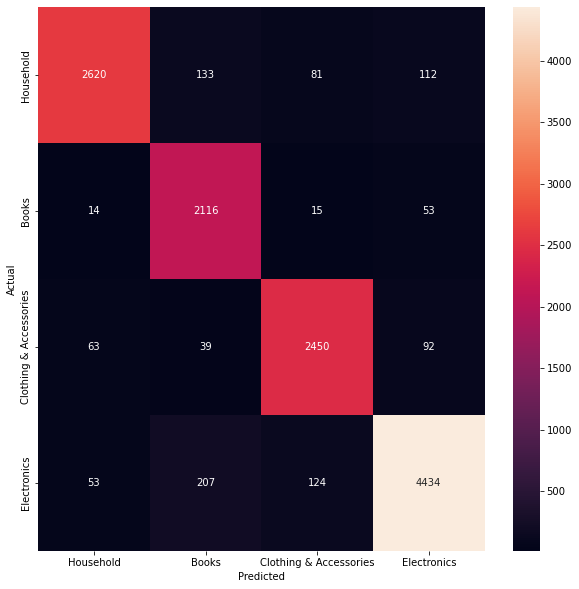

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=filtered_df['class'].drop_duplicates().values, yticklabels=filtered_df['class'].drop_duplicates().values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [99]:
from sklearn.metrics import classification_report
target_names = filtered_df['class'].drop_duplicates().values
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

             Household       0.95      0.89      0.92      2946
                 Books       0.85      0.96      0.90      2198
Clothing & Accessories       0.92      0.93      0.92      2644
           Electronics       0.95      0.92      0.93      4818

              accuracy                           0.92     12606
             macro avg       0.92      0.92      0.92     12606
          weighted avg       0.92      0.92      0.92     12606

